# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [2]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action="ignore", category=FutureWarning)

---
## 2. Load data

In [3]:
df = pd.read_csv('clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [5]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv('price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [8]:
monthly_price_by_id.groupby('id').last()

,price_date,price_off_peak_var,price_off_peak_fix
id,,,
0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930
...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,2015-12-01,0.112488,40.728885
fffac626da707b1b5ab11e8431a4d0a2,2015-12-01,0.145047,44.444710
fffc0cacd305dd51f316424bbb08d1bd,2015-12-01,0.151399,41.228885


In the dataset, we have some datetime features:

date_activ = date of activation of the contract
date_end = registered date of the end of the contract
date_modif_prod = date of the last modification of the product
date_renewal = date of the next contract renewal
From these features, we can create new columns called:

tenure: the time customer uses service of PowerCo
months_activ = Number of months active until reference date (Jan 2016)
months_to_end = Number of months of the contract left until reference date (Jan 2016)
months_modif_prod = Number of months since last modification until reference date (Jan 2016)
months_renewal = Number of months since last renewal until reference date (Jan 2016)


In [9]:
df = pd.merge(df,diff,on="id")
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


In [10]:
# We no longer need the datetime columns so we can drop them
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


### Transform Categorical Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               14606 non-null  object 
 1   channel_sales                    14606 non-null  object 
 2   cons_12m                         14606 non-null  int64  
 3   cons_gas_12m                     14606 non-null  int64  
 4   cons_last_month                  14606 non-null  int64  
 5   forecast_cons_12m                14606 non-null  float64
 6   forecast_cons_year               14606 non-null  int64  
 7   forecast_discount_energy         14606 non-null  float64
 8   forecast_meter_rent_12m          14606 non-null  float64
 9   forecast_price_energy_off_peak   14606 non-null  float64
 10  forecast_price_energy_peak       14606 non-null  float64
 11  forecast_price_pow_off_peak      14606 non-null  float64
 12  has_gas           

In [12]:
# df["has_gas"].unique()
df["has_gas"] = df["has_gas"].replace(['t','f'],[1,0])

In [13]:
df["channel_sales"].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [14]:
df["origin_up"].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [15]:
df = pd.get_dummies(df,columns=["channel_sales","origin_up"])

In [16]:
df.nunique()

id                                                14606
cons_12m                                          11065
cons_gas_12m                                       2112
cons_last_month                                    4751
forecast_cons_12m                                 13993
forecast_cons_year                                 4218
forecast_discount_energy                             12
forecast_meter_rent_12m                            3528
forecast_price_energy_off_peak                      516
forecast_price_energy_peak                          329
forecast_price_pow_off_peak                          41
has_gas                                               2
imp_cons                                           7752
margin_gross_pow_ele                               2391
margin_net_pow_ele                                 2391
nb_prod_act                                          10
net_margin                                        11965
num_years_antig                                 

In [17]:
df = df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds',
                      'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
                      'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
                      'origin_up_MISSING',
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0.020057,3.700961,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,-0.003767,0.177779,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,-0.004670,0.177779,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,-0.004547,0.177779,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,-0.006192,0.162916,True,False,False,False,False,True,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 48 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  int64  
 2   cons_gas_12m                                    14606 non-null  int64  
 3   cons_last_month                                 14606 non-null  int64  
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  int64  
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

### Transform Numerical Data

In [19]:
numeric_features = df[[
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]]
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


C:\Users\walee\AppData\Local\Temp\ipykernel_9244\1024028203.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, ax = ax, color="purple")
C:\Users\walee\AppData\Local\Temp\ipykernel_9244\1024028203.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, ax = ax, color="purple")
C:\U

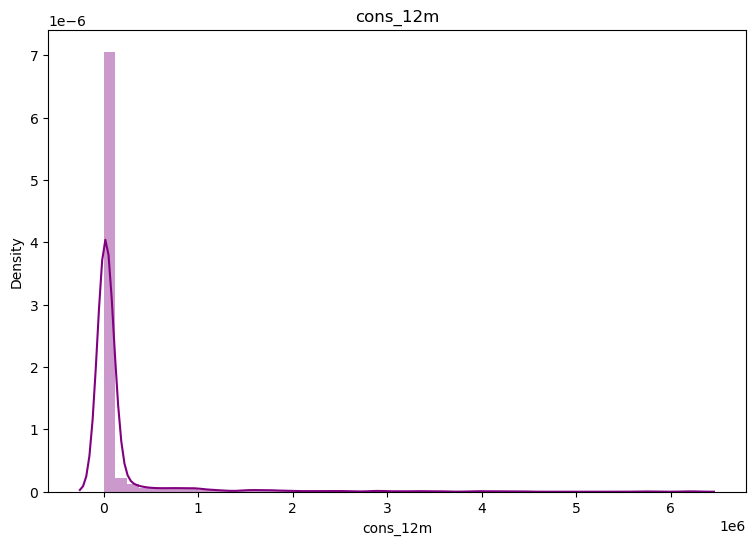

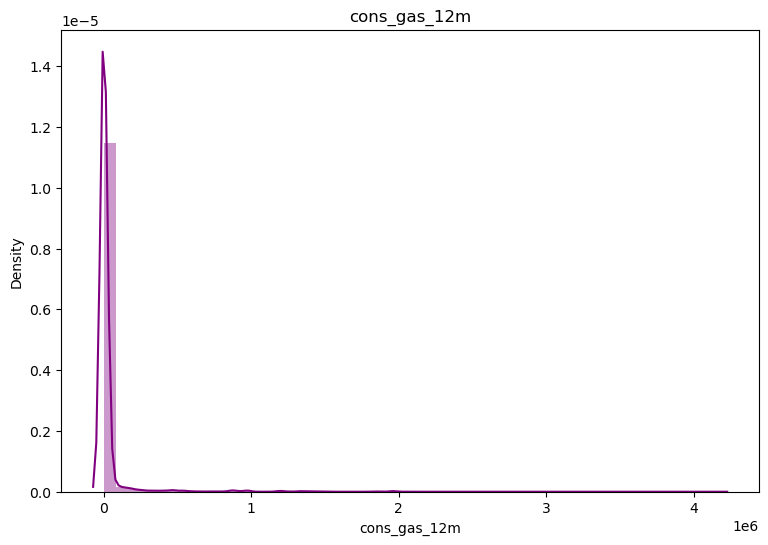

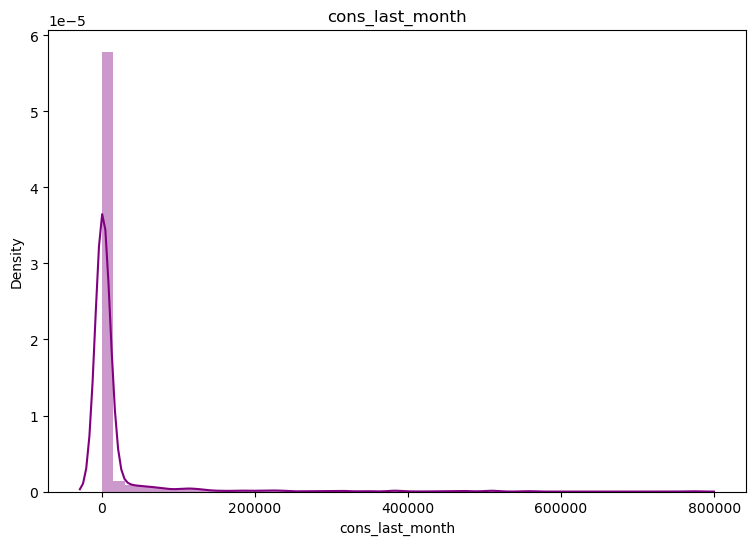

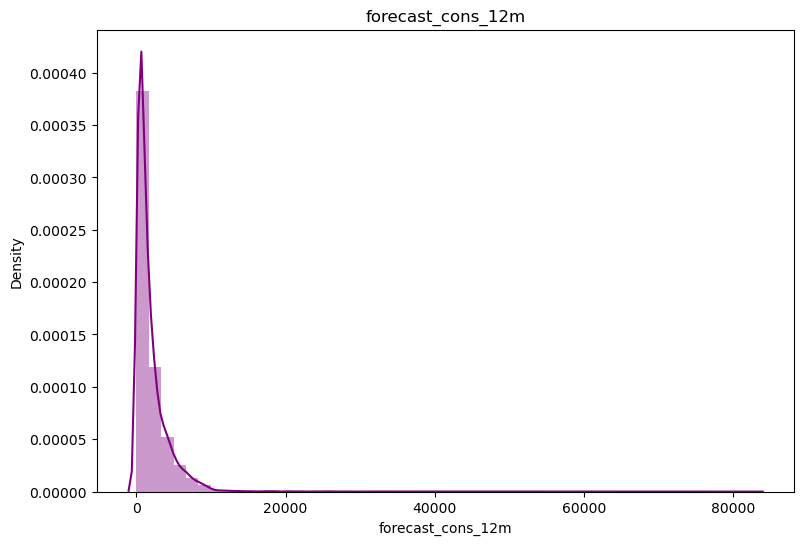

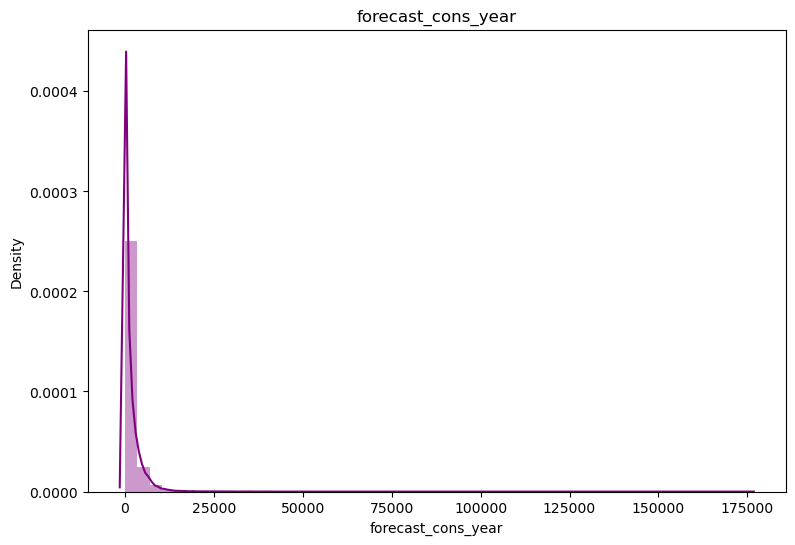

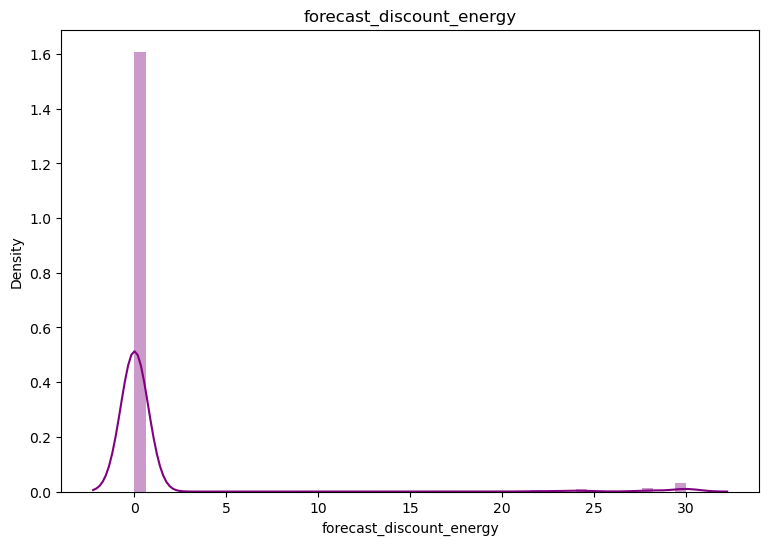

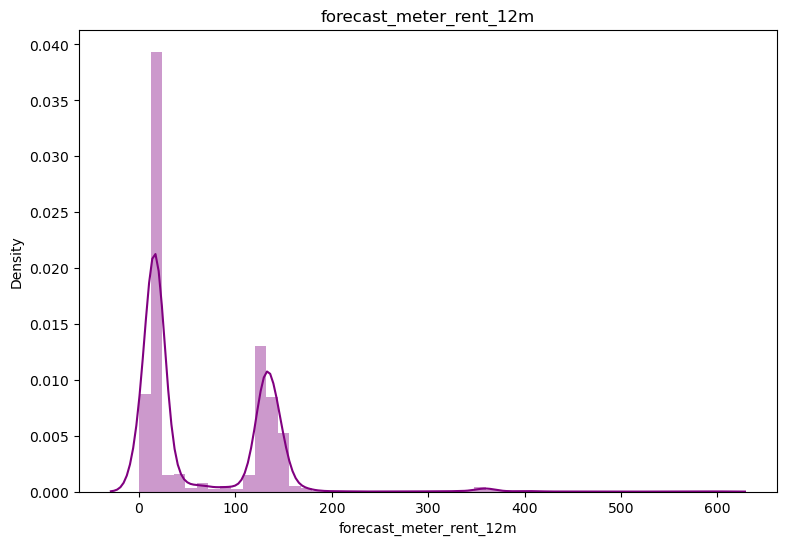

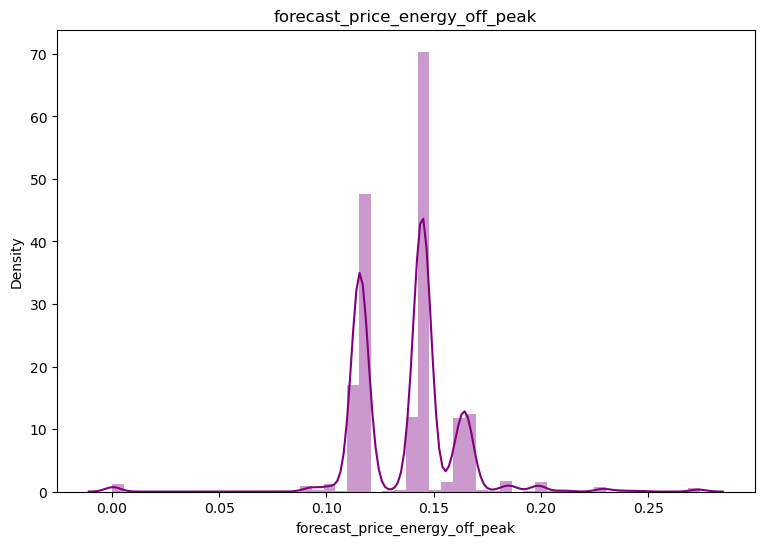

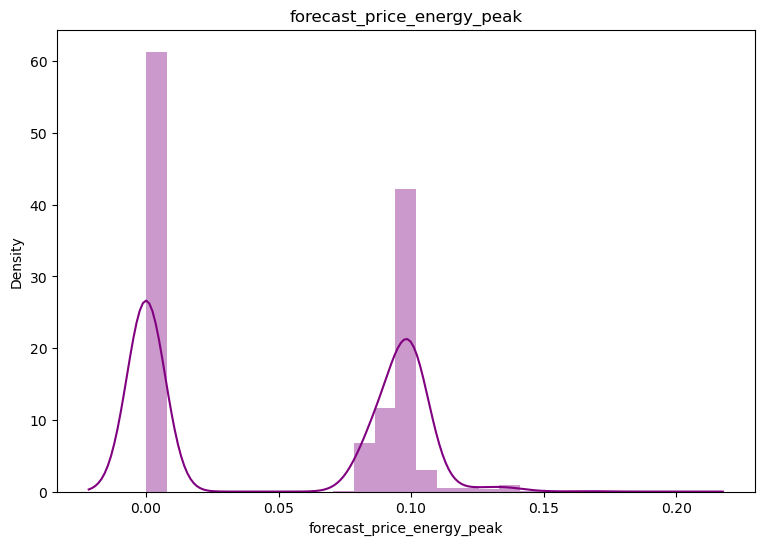

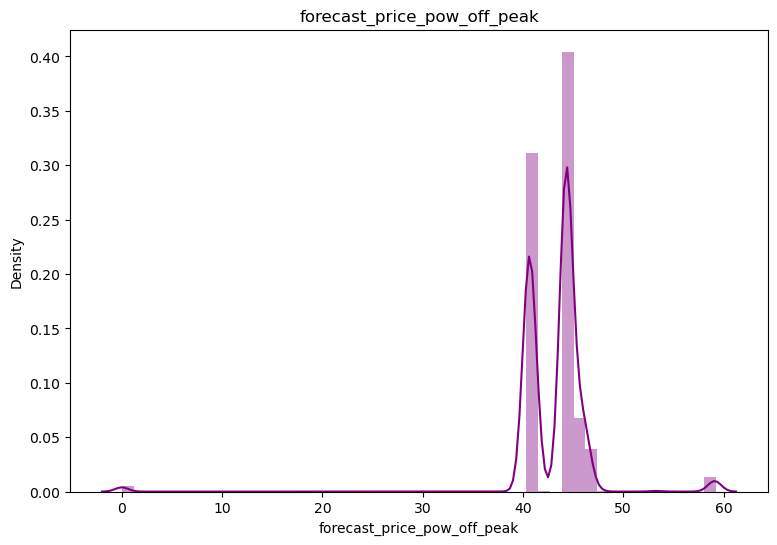

In [20]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax, color="purple")
    ax.set_title(col)
plt.show();

The SD for all of the above values is quite high so in order to fix this we will apply log and also add 1 since log cannot be applied to the values of 1

In [21]:
import numpy as np
for i in numeric_features:
    df[i]=df[i].apply(lambda x:np.log(1+x))

C:\Users\walee\AppData\Local\Temp\ipykernel_9244\1933286742.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, ax = ax, color="blue")
C:\Users\walee\AppData\Local\Temp\ipykernel_9244\1933286742.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, ax = ax, color="blue")
C:\Users

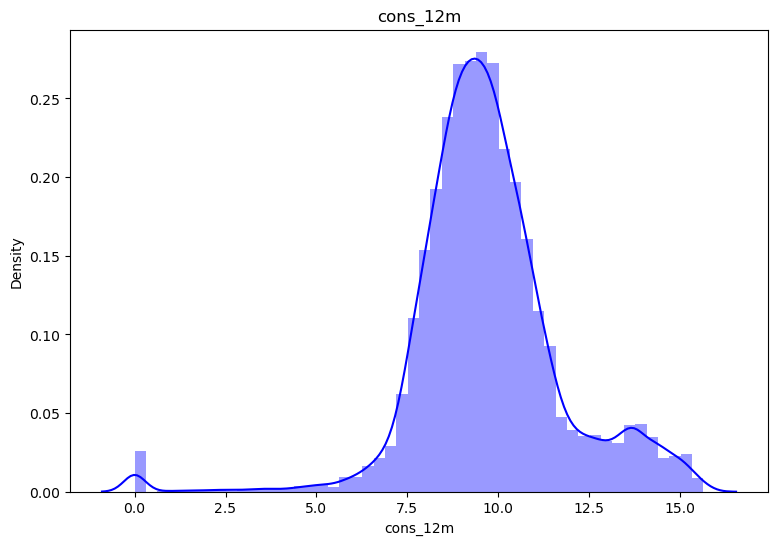

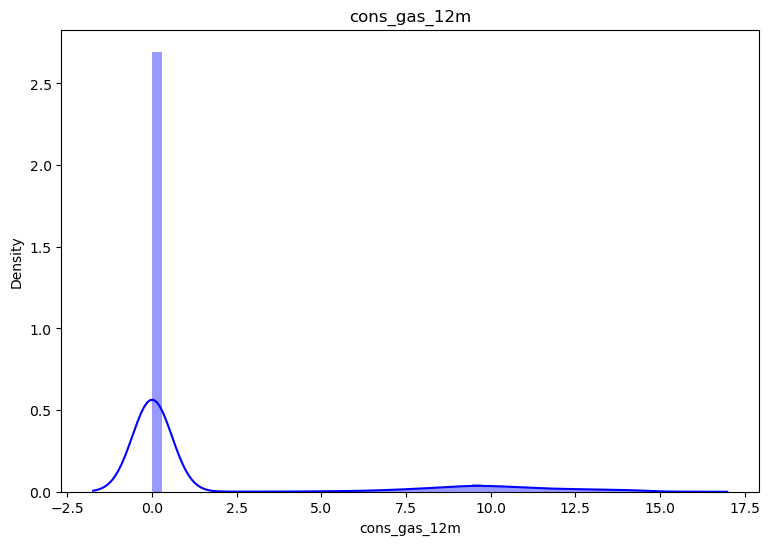

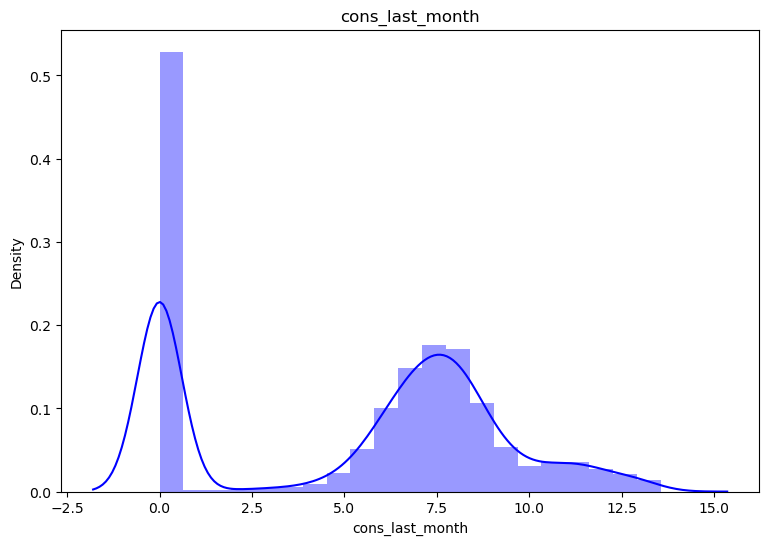

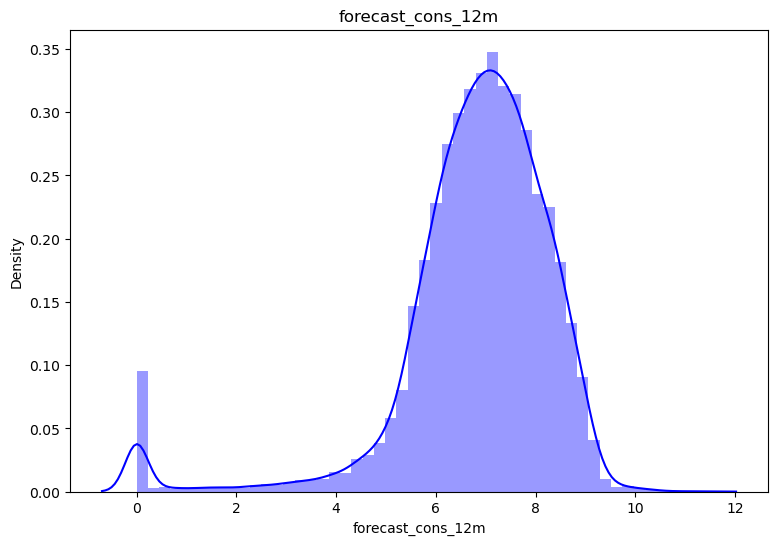

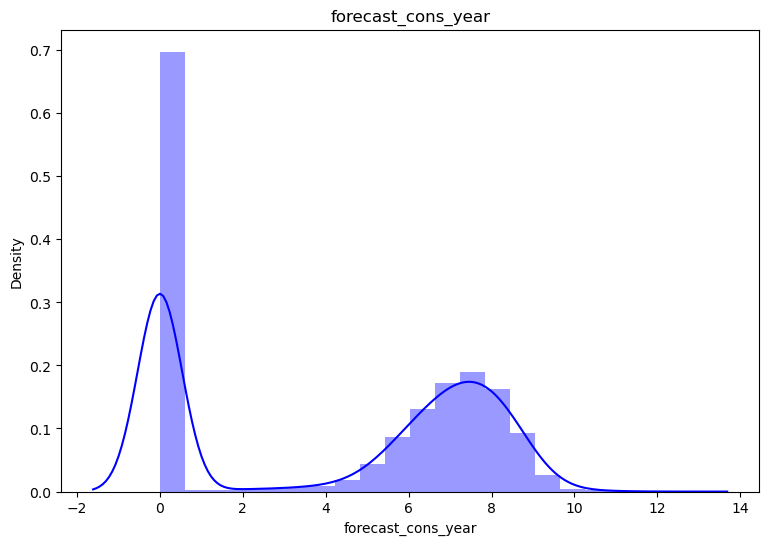

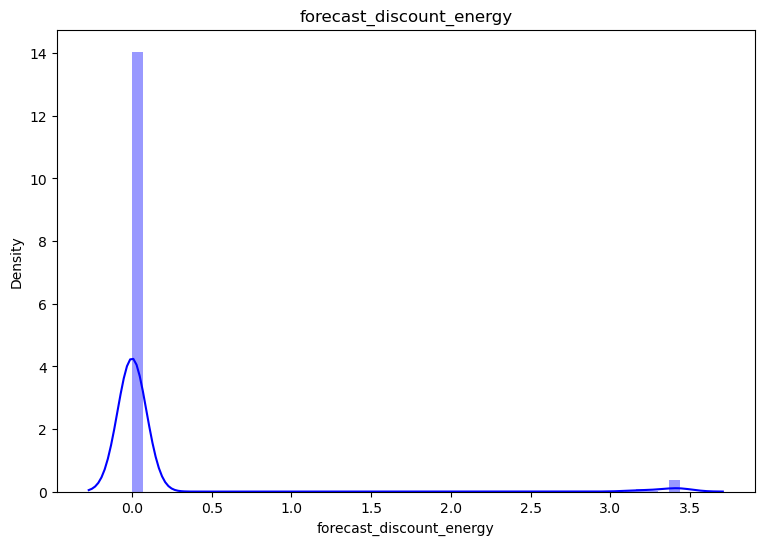

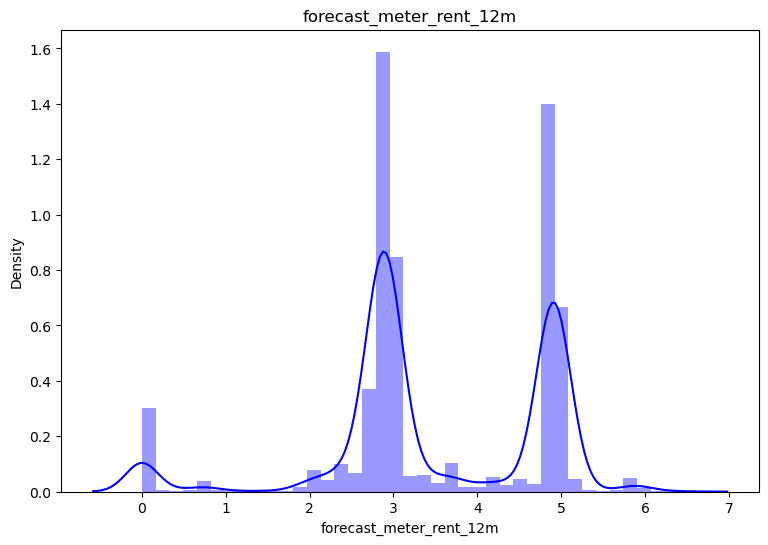

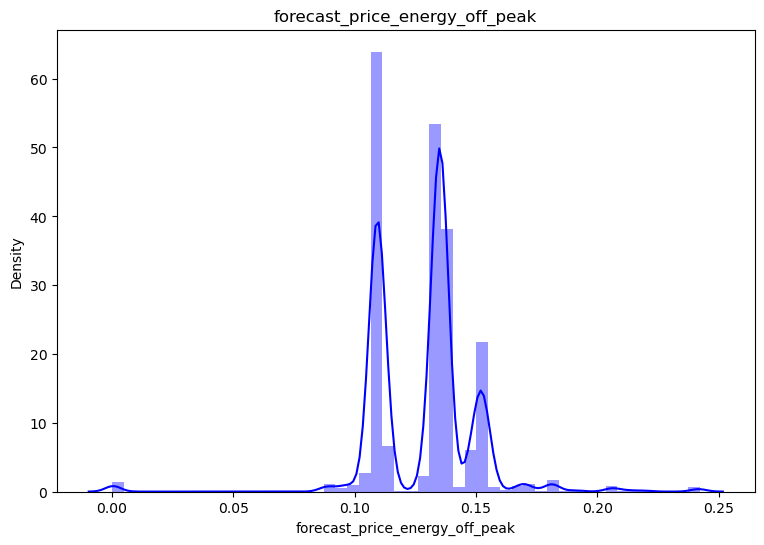

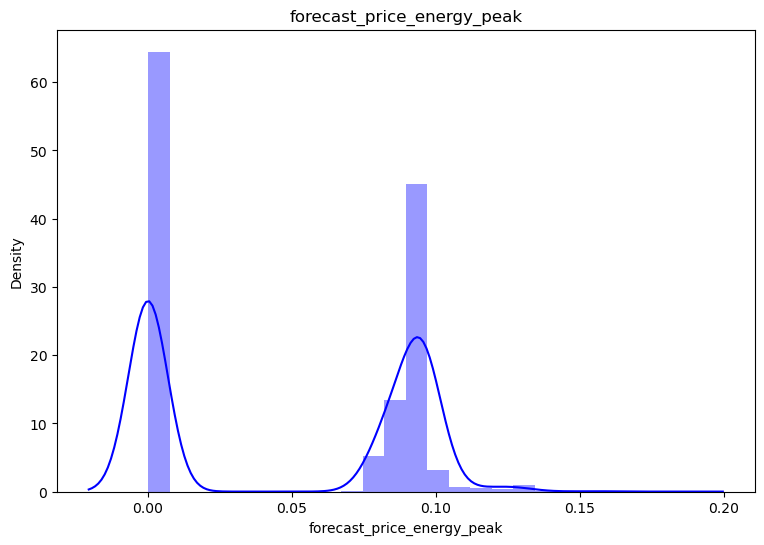

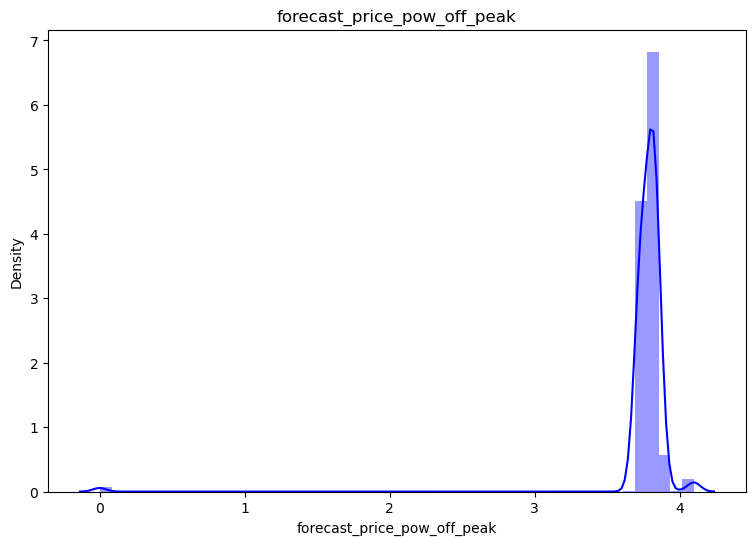

In [22]:
# Let's quickly check the distributions after log transformation.

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax, color="blue")
    ax.set_title(col)
plt.show()

In [23]:
correlation = df.select_dtypes("number").corr()

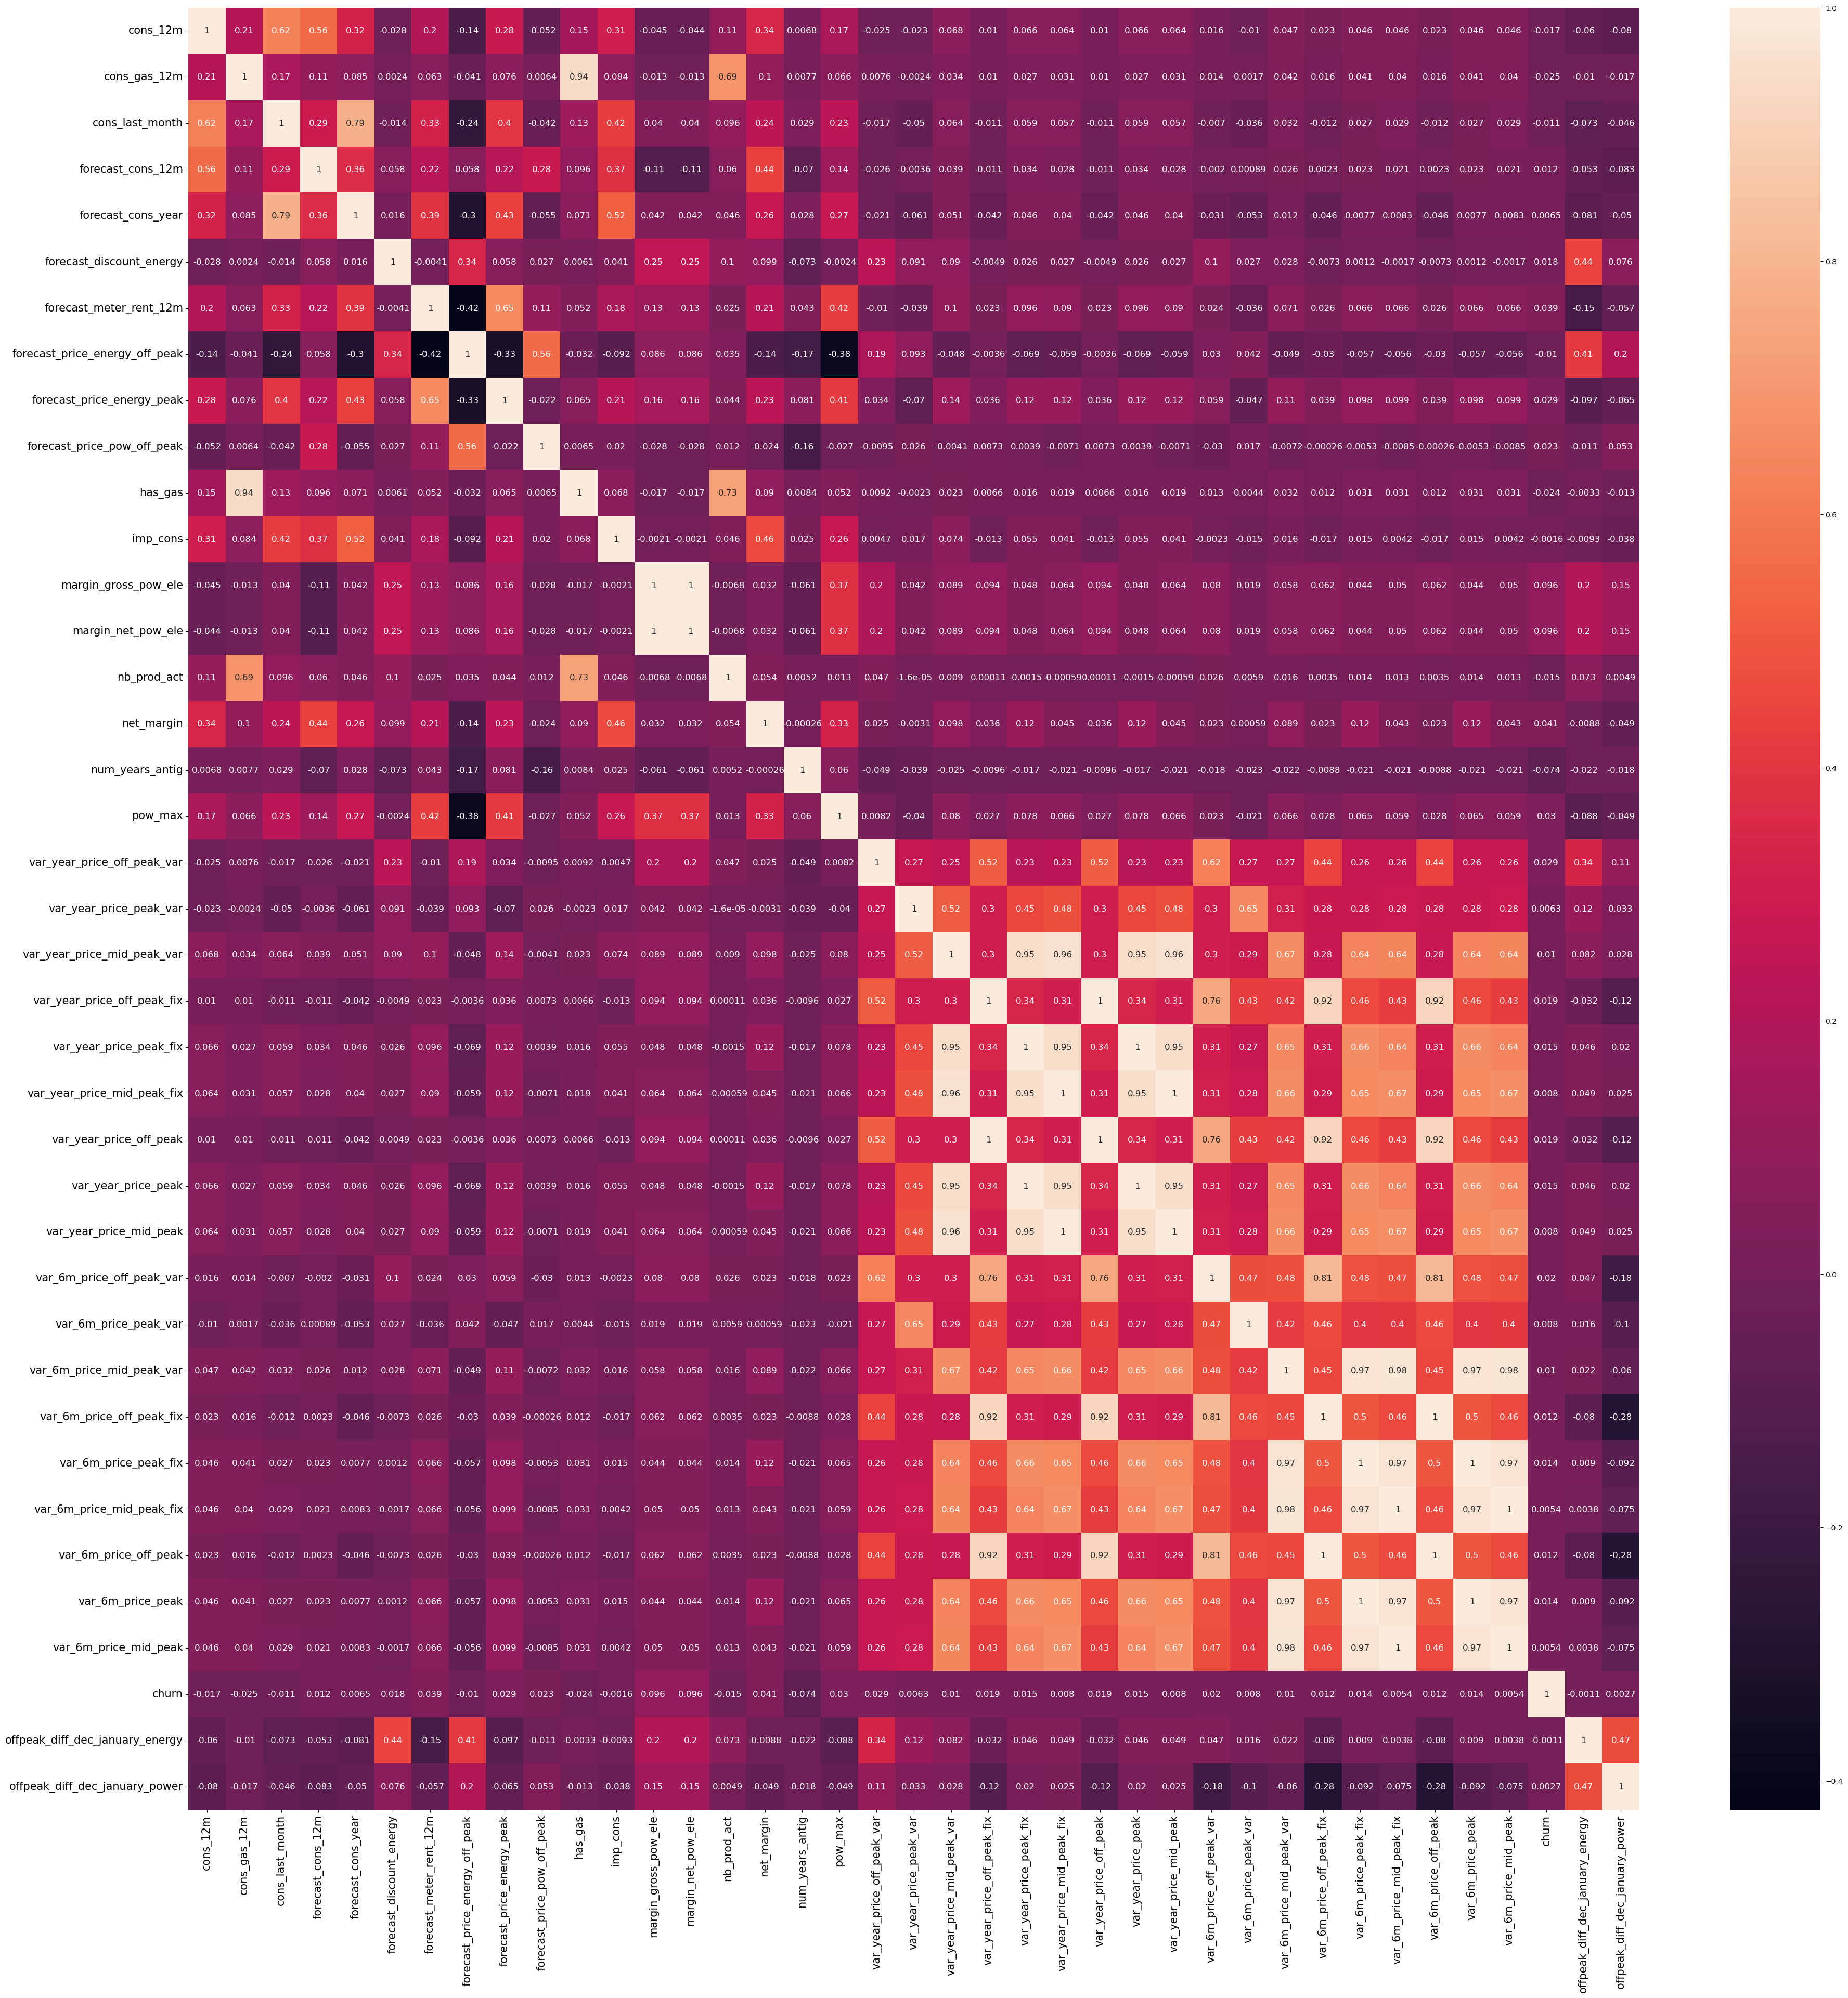

In [24]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 48 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  float64
 2   cons_gas_12m                                    14606 non-null  float64
 3   cons_last_month                                 14606 non-null  float64
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  float64
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

In [26]:
df = df.drop(columns=['var_year_price_mid_peak_var', 'var_year_price_peak_fix', 'var_year_price_mid_peak_fix', 
                      'var_year_price_peak', 'var_year_price_mid_peak', 'var_6m_price_mid_peak_var', 
                      'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix', 'var_6m_price_peak',
                      'var_6m_price_mid_peak', 'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix', 
                      'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix', 'var_6m_price_peak',
                      'var_6m_price_mid_peak'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,10.914124,0.000000,0.000000,0.000000,0.0,1.022451,0.108389,0.093620,...,0.020057,3.700961,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,8.446985,0.000000,0.000000,5.252012,0.000000,0.0,2.848971,0.136025,0.000000,...,-0.003767,0.177779,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,6.300786,0.000000,0.000000,3.891004,0.000000,0.0,3.681855,0.153402,0.084248,...,-0.004670,0.177779,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,7.368340,0.000000,0.000000,5.484963,0.000000,0.0,3.036394,0.136883,0.000000,...,-0.004547,0.177779,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,8.395252,0.000000,6.267201,6.101999,6.267201,0.0,4.888317,0.110557,0.095324,...,-0.006192,0.162916,True,False,False,False,False,True,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  float64
 2   cons_gas_12m                                    14606 non-null  float64
 3   cons_last_month                                 14606 non-null  float64
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  float64
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

## Model Building

In [28]:
X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [29]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [30]:
y.value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

#### for An imbalanced prediction columns

In [31]:
# !pip uninstall scikit-learn --yes

In [32]:
# !pip uninstall imblearn --yes

In [33]:
# !pip install scikit-learn==1.2.2

In [34]:
# !pip install imblearn

In [36]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [37]:
#check the number of target variable after oversampling using SMOTE
from collections import Counter
print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({1: 13187, 0: 13187})


In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10224, 35)
(10224,)
(4382, 35)
(4382,)


In [39]:
from sklearn.linear_model import LogisticRegression

In [47]:
model_lr = LogisticRegression(max_iter=5000)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [51]:
y_pred = model_lr.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9100867183934277


Text(113.9222222222222, 0.5, 'Actual')

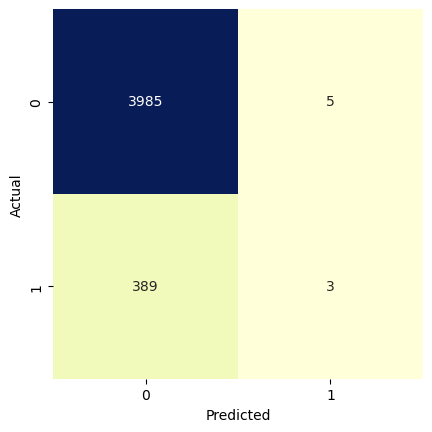

In [53]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [54]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 3
False positives: 5
True negatives: 3985
False negatives: 389



In [55]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3990
           1       0.38      0.01      0.01       392

    accuracy                           0.91      4382
   macro avg       0.64      0.50      0.48      4382
weighted avg       0.86      0.91      0.87      4382



In [56]:
# retrieve the precision_score and recall_score metrics
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))

Overall Precision: 0.375
Overall Recall: 0.007653061224489796


In [57]:
y_scores = model_lr.predict_proba(X_test)
print(y_scores[:10])

[[0.93318827 0.06681173]
 [0.9218602  0.0781398 ]
 [0.91850881 0.08149119]
 [0.91664694 0.08335306]
 [0.89362107 0.10637893]
 [0.87318022 0.12681978]
 [0.9761432  0.0238568 ]
 [0.94308976 0.05691024]
 [0.94632908 0.05367092]
 [0.93005147 0.06994853]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

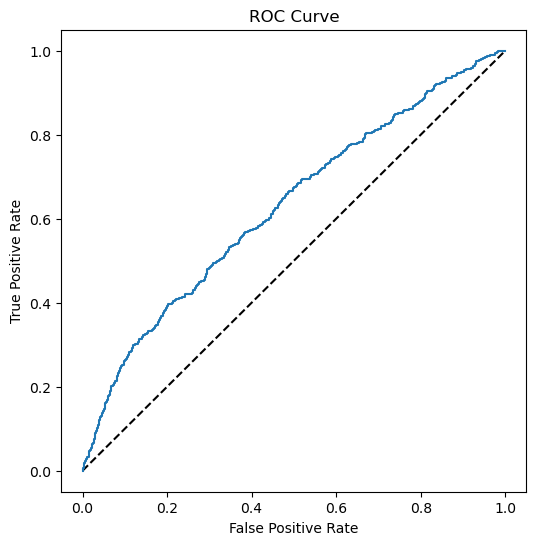

In [58]:
from sklearn.metrics import roc_curve
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [59]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6277984502071505


Looking at the true negatives, we have 3985 out of 3990. This means that out of all the negative cases (churn = 0), we predicted 3981 as negative (hence the name True negative). This is great!

Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is too high at 392, but we want to get the false negatives to as close to 0 as we can.

Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 5, quite good.

With the true positives, we can see that in total we have 392 clients that churned in the test dataset. However, we are only able to correctly identify 3 of those 393, which is very poor.

Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.

Looking at the precision score and recall score, this shows us a score of 0.3 and 0.007 which are very bad. This is not a good model.

### RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model_rf = RandomForestClassifier(n_estimators = 1000)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

True positives: 18
False positives: 0
True negatives: 3990
False negatives: 374

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      3990
           1       1.00      0.05      0.09       392

    accuracy                           0.91      4382
   macro avg       0.96      0.52      0.52      4382
weighted avg       0.92      0.91      0.88      4382

Accuracy: 0.9146508443633045
Overall Precision: 1.0
Overall Recall: 0.04591836734693878

AUC: 0.6814453224898982


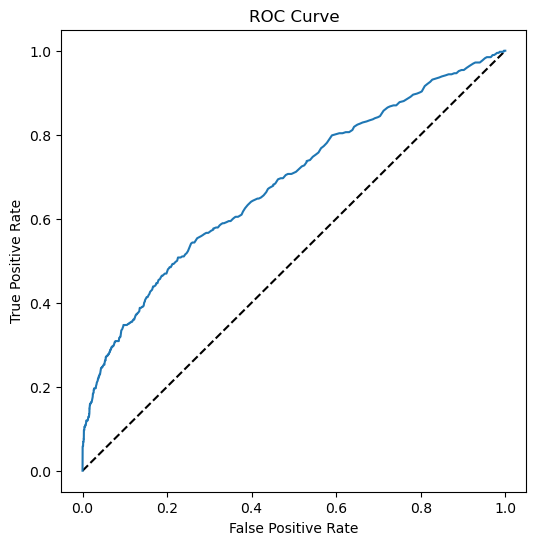

In [62]:
y_pred_RF = model_rf.predict(X_test)
y_scores_RF = model_rf.predict_proba(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(classification_report(y_test, y_pred_RF))

print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Text(113.9222222222222, 0.5, 'Actual')

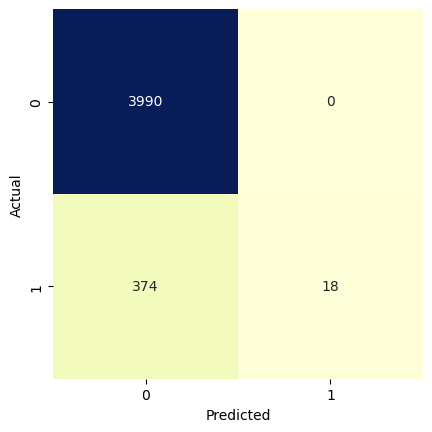

In [63]:
cm = confusion_matrix(y_test, y_pred_RF) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Looking at the true negatives, we have 3990 out of 3990. This is great!

Looking at the false negatives, 374 is too high but better than Logistic Model.

Looking at false positives, we can see there are only , quite good.

With the true positives, we correctly identify 18 of those 392, which is very poor.

Looking at the accuracy score, this is very misleading, looking at the precision score and recall score, this shows us a score of 0.81 which is not bad, but could be improved. However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

The AUC is better a little bit comparing with Logistic Regression.

## Model Understanding

Feature importances indicate the importance of a feature within the predictive model.

In [64]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

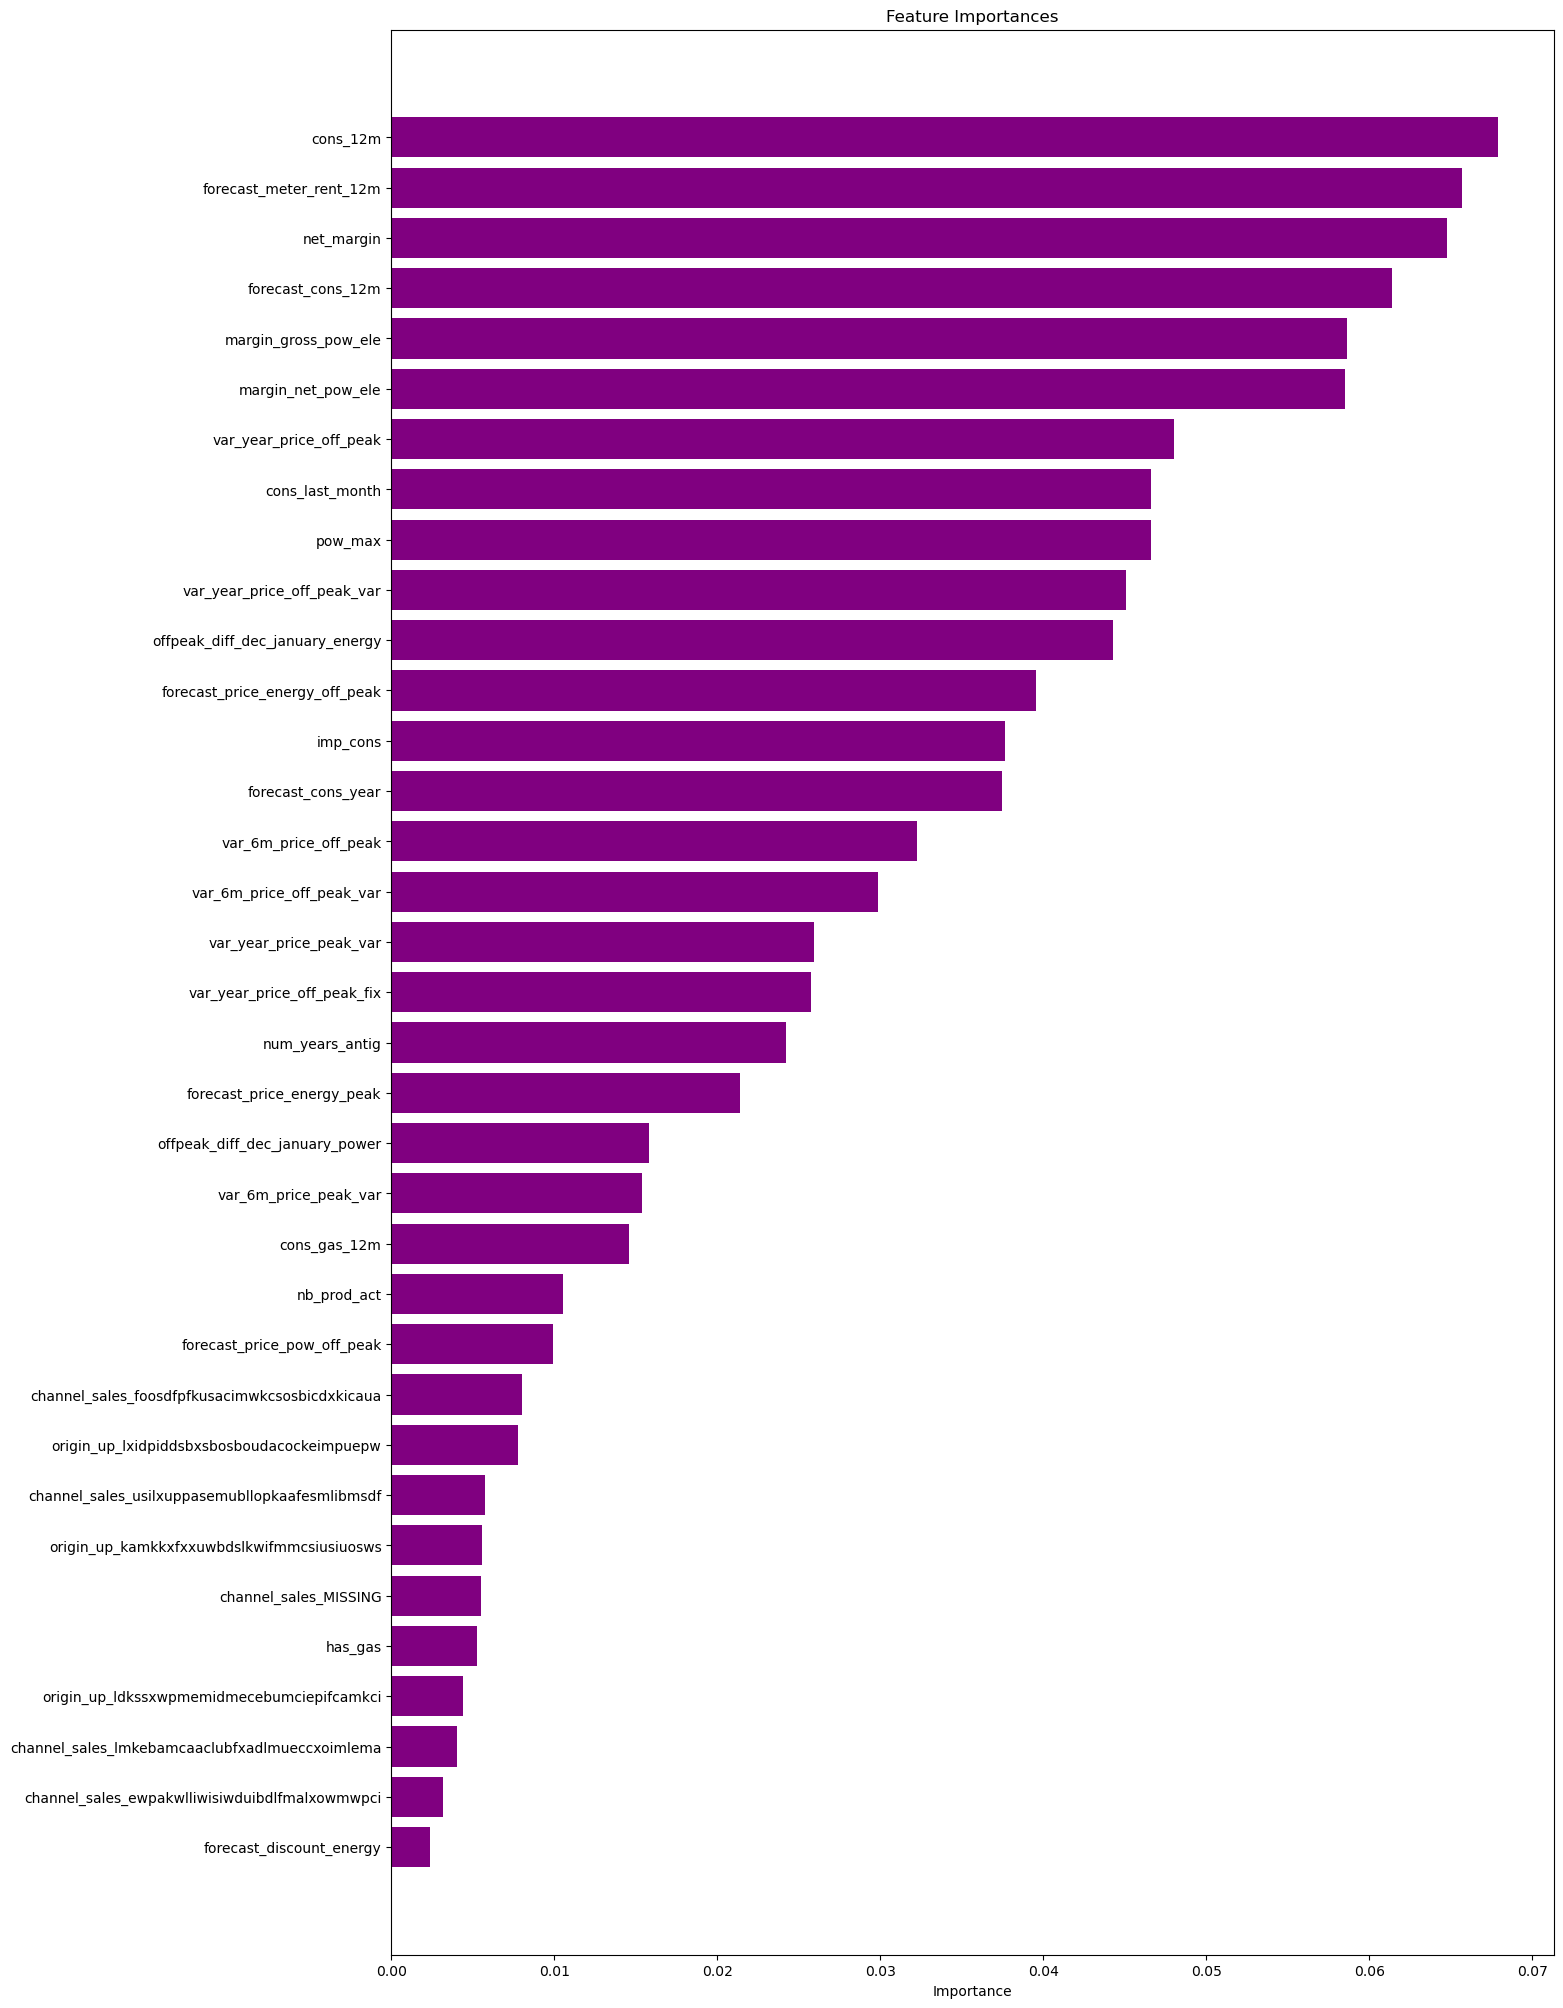

In [65]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

- From this chart, we can observe the following points:

Consumption over 12 months and forecast meter rent 12 month are a top driver for churn in this model

Net margin also plays an important role in the predictive model.

Our price sensitivity features are scattered around but are not the main driver for a customer churning

`Lastly answering our hypothesis Prices are not the important feature for the churn of the customers`

In [66]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [68]:
y_scores = model_rf.predict_proba(X_test)
probabilities = y_scores[:, 1]

In [69]:
X_test['churn'] = y_pred_RF.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('data_with_predictions.csv')

In [71]:
import joblib

# Save the model as a pickle file
filename = 'powerco_churn_model.pkl'
joblib.dump(model_rf, filename)

['powerco_churn_model.pkl']